<a href="https://colab.research.google.com/github/karthik1338/geeksforgeeks/blob/main/day1_gfg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context('notebook', font_scale=1.2)

In [4]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.47 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [6]:
titanic_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Titanic-Dataset.csv')
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
titanic_df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [8]:
titanic_df.shape

(891, 12)

In [9]:
titanic_df.info()
# summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


data set contains 891 passengers and age, cabin, embarked have missing values

In [10]:
print('discription')
titanic_df.describe()

discription


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

##Data cleaning
numirical data : median

catorigal data : mode

high cardinality/ Too many missing values : remove the column or engineer a new feature from it


In [12]:
titanic_df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [15]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)

In [16]:
titanic_df[['Age','Cabin', 'Embarked']].isna().sum()

Age           0
Cabin       687
Embarked      2
dtype: int64

In [17]:
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(mode_embarked, inplace=True)

In [18]:
titanic_df['Has_Cabin'] = titanic_df['Cabin'].notna().astype(int)
titanic_df.drop('Cabin', axis=1, inplace=True)
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  
0      0         A/5 21171   7.2500        S          0  
1      0          PC 17599  71.2833        C          1  
2      0  STON/O2. 3101282   7.9250        S          0  
3      0            113803  53.1000        S          1  
4      0            373450   8.0500        S          0

In [19]:
titanic_df['Has_Cabin'].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

In [20]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

#unovariant analysis:

This is the simplest way of analysis the data containing only one variable/ features/ column . The main purpose is to describe data and find the patterns within it.

## for categorial variable :
use frequency ex: countplot, pie chats
## for numerial vaiable :
histogram -> histplot, kernel densityplot -> kdeplot for distribstion, box plot -> boxplot for tendency, spread, outliers.

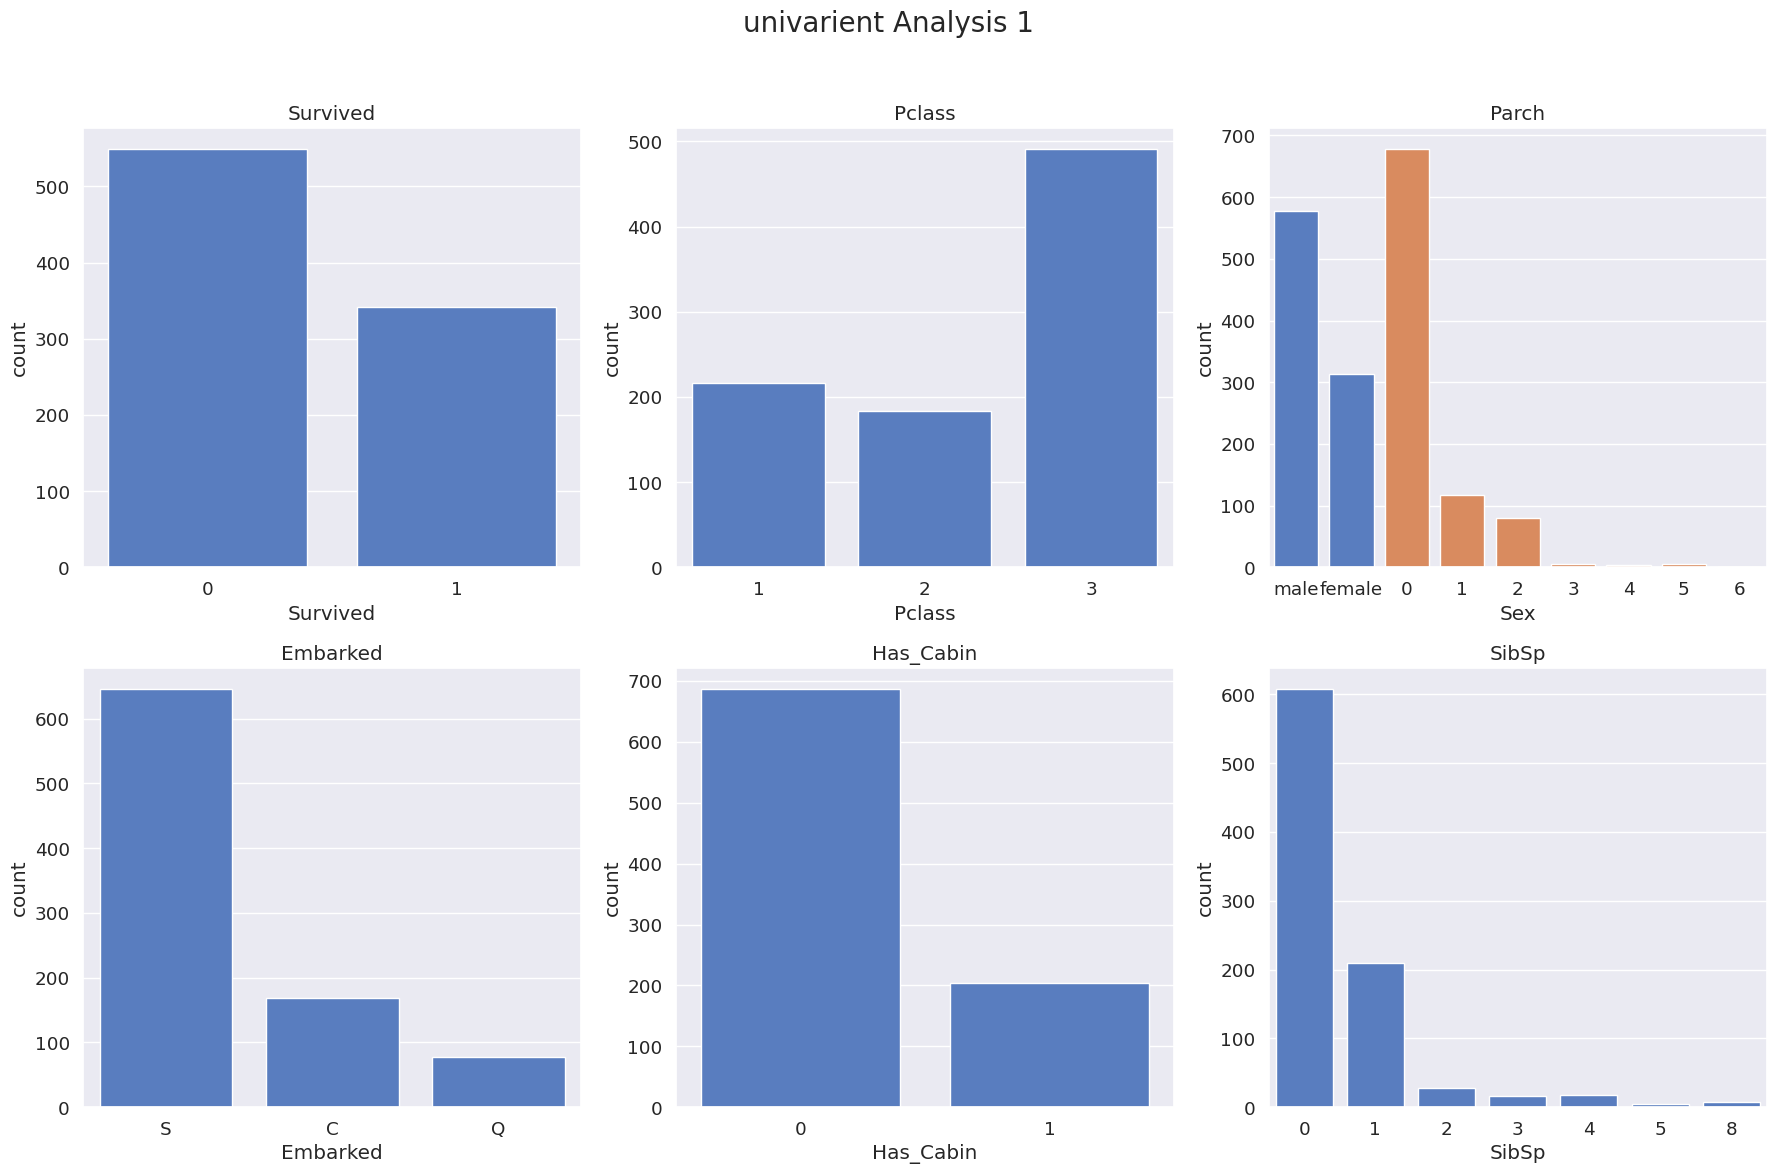

In [22]:
# set up the figure for ploting
fig, axis = plt.subplots(2, 3, figsize=(18,12))
fig.suptitle("univarient Analysis 1", fontsize=20)

# plotting  each catigorical features
sns.countplot(x='Survived', data=titanic_df, ax=axis[0,0]).set_title('Survived')
sns.countplot(x='Pclass', data=titanic_df, ax=axis[0,1]).set_title('Pclass')
sns.countplot(x='Sex', data=titanic_df, ax=axis[0,2]).set_title('Sex')
sns.countplot(x='Embarked', data=titanic_df, ax=axis[1,0]).set_title('Embarked')
sns.countplot(x='Has_Cabin', data=titanic_df, ax=axis[1,1]).set_title('Has_Cabin')
sns.countplot(x='SibSp', data=titanic_df, ax=axis[1,2]).set_title('SibSp')
sns.countplot(x='Parch', data=titanic_df, ax=axis[0,2]).set_title('Parch')

plt.tight_layout(rect = [0,0,1,0.96])
plt.show()

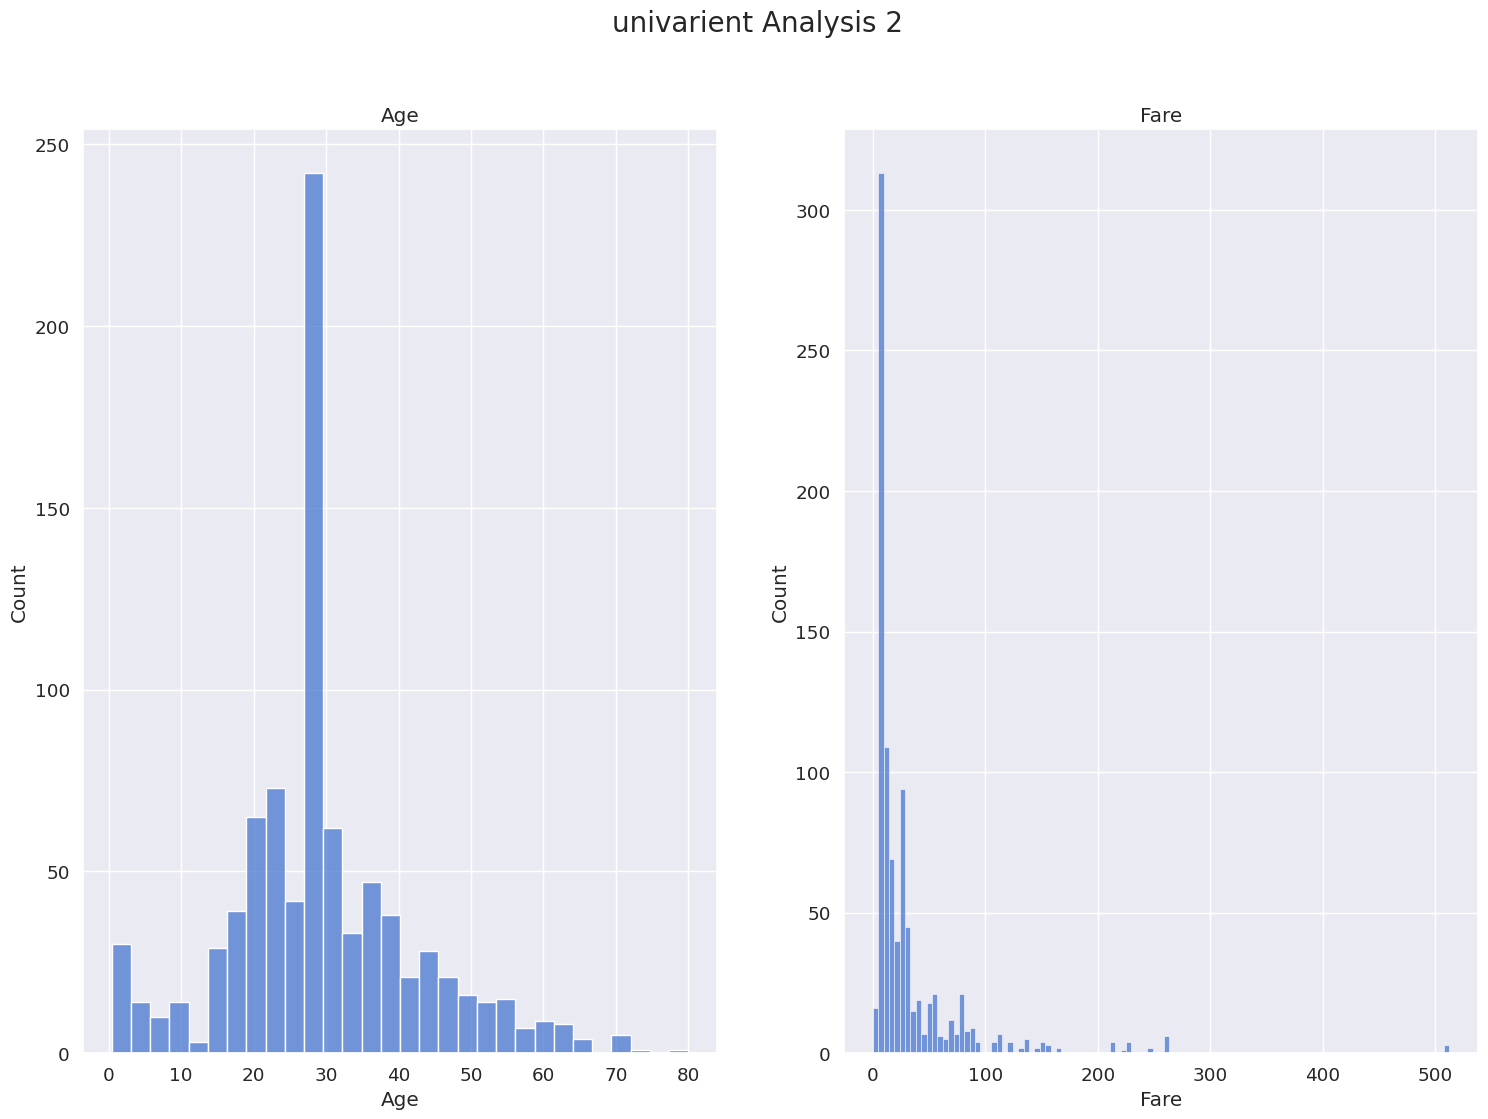

In [25]:
fig , axis = plt.subplots(1, 2, figsize=(18,12))
fig.suptitle("univarient Analysis 2", fontsize=20)
sns.histplot(x='Age', data=titanic_df, ax=axis[0]).set_title('Age')
sns.histplot(x='Fare', data=titanic_df, ax=axis[1]).set_title('Fare')
plt.show()

Bivariate analysis:

categorical vs numerical : barplot, boxplot, violin plots

categorical vs categorical : staked bar chart or contingency tables

numerical vs numerical : scatterplot.

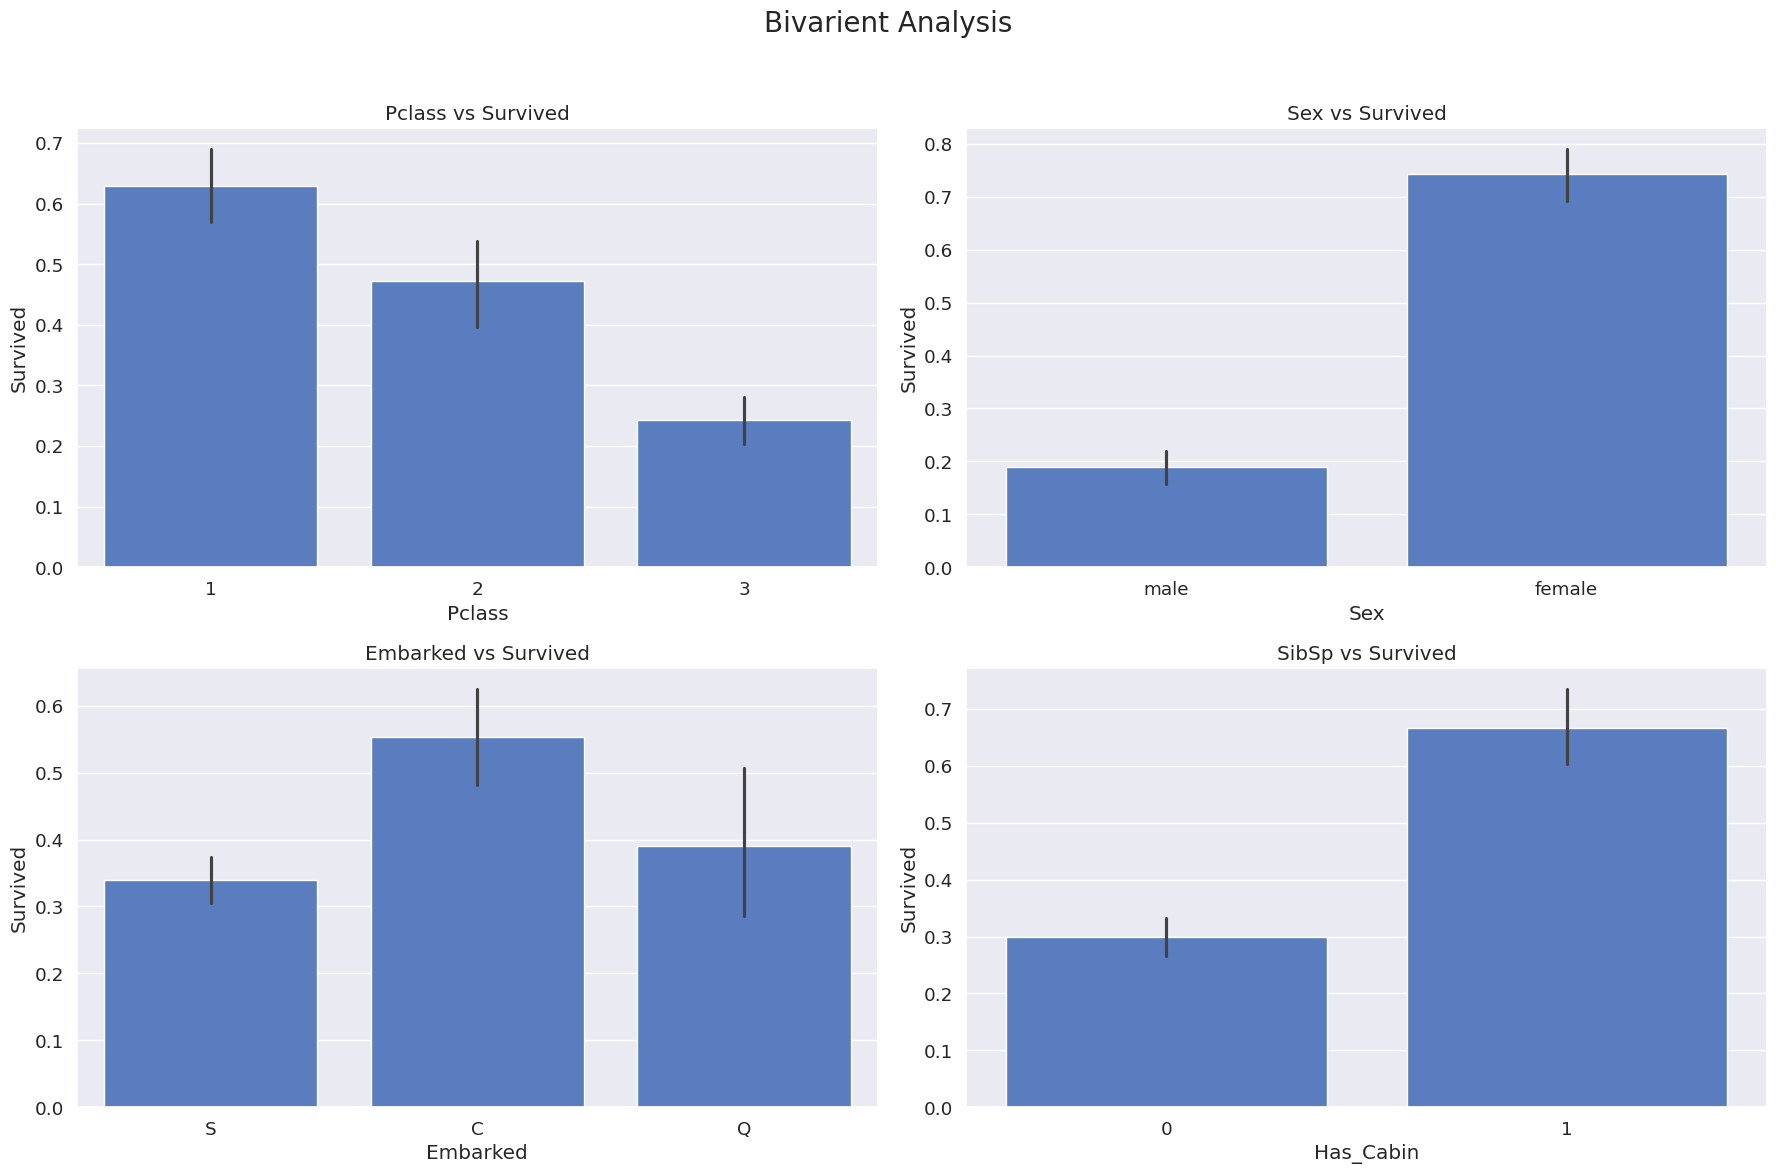

In [27]:
# bivariant plots
fig, axis = plt.subplots(2, 2, figsize=(18,12))
fig.suptitle("Bivarient Analysis", fontsize=20)

#pclass vs survived
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ax=axis[0,0]).set_title('Pclass vs Survived')
# sex vs survived
sns.barplot(x='Sex', y='Survived', data=titanic_df, ax=axis[0,1]).set_title('Sex vs Survived')
# embarked vs survived
sns.barplot(x='Embarked', y='Survived', data=titanic_df, ax=axis[1,0]).set_title('Embarked vs Survived')
# sibsp vs survived
sns.barplot(x='Has_Cabin', y='Survived', data=titanic_df, ax=axis[1,1]).set_title('SibSp vs Survived')
plt.tight_layout(rect = [0,0,1,0.96])
plt.show()



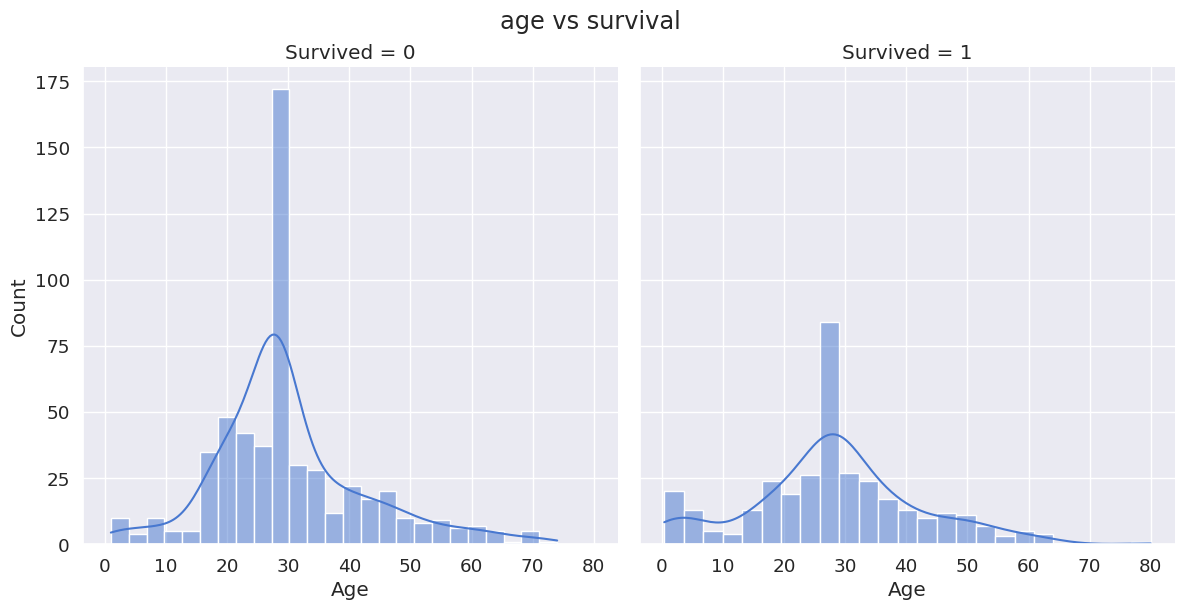

In [30]:
g = sns.FacetGrid(titanic_df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins = 25, kde=True)
g.add_legend()
# g.add_legend()
plt.suptitle("age vs survival ", y = 1.02)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

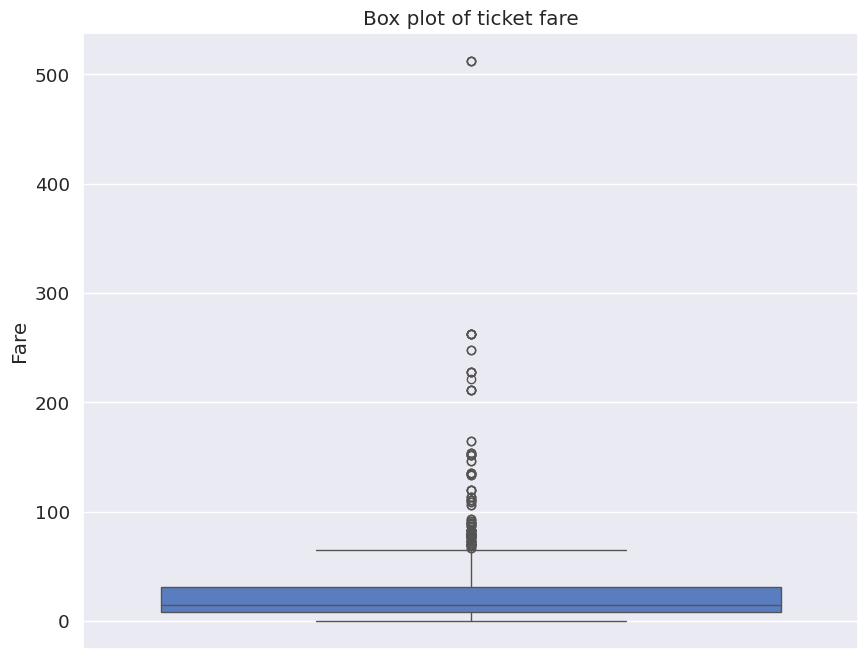

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(y = 'Fare', data = titanic_df)
plt.title('Box plot of ticket fare')
plt.ylable('Fare')
plt.show()

feature engineering
it is the process of using domain knowledge to extract features (characteristics, properties, atteributes) from raw data .

a good feature be relvant to problemand easy for a model to understand.

common techniques

1. Combining features : combine 2 featurs to one feature
2. Extracting from text : self explinotory
3. Binning : converting a continous numerical feature into categorical one ex: age -> num to child, adult , senior -> categorical

multivarient analysis


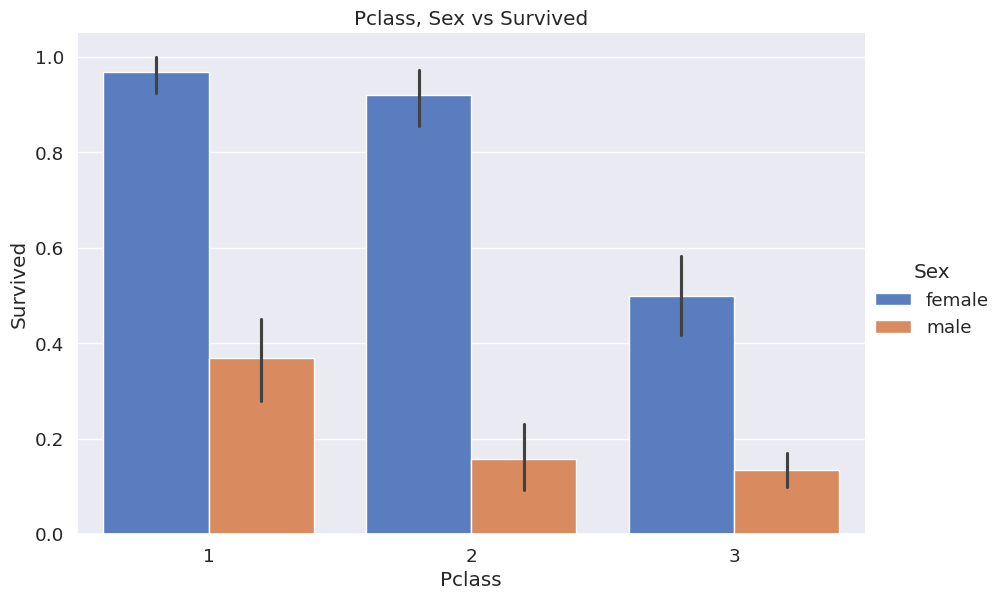

In [35]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, kind='bar', height = 6, aspect = 1.5)
plt.title('Pclass, Sex vs Survived')
plt.ylabel('Survived')
plt.show()


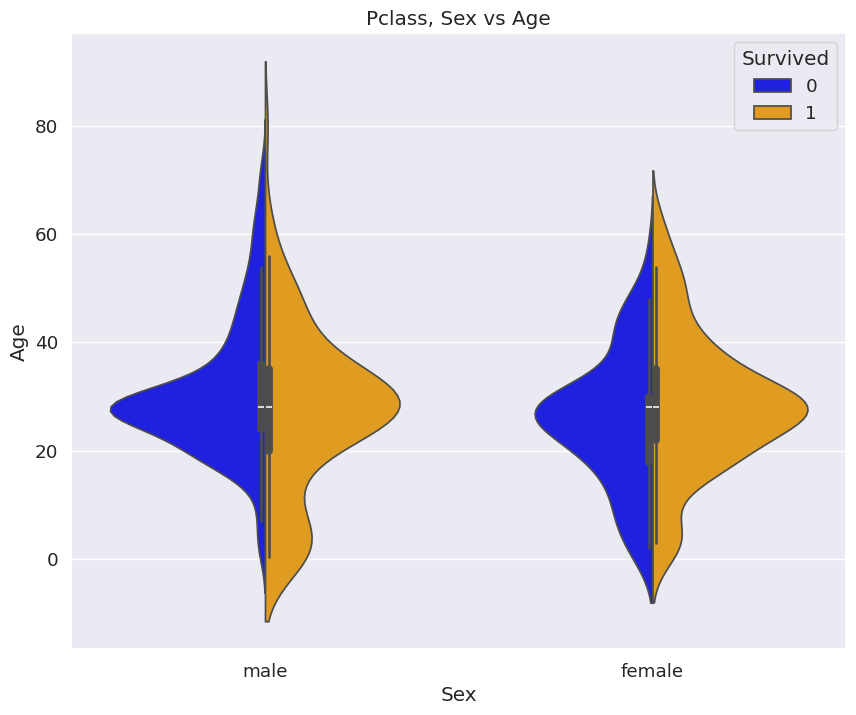

In [37]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True, palette={0:'blue', 1:'orange'})
plt.title('Pclass, Sex vs Age')
plt.show()

correlation analysis


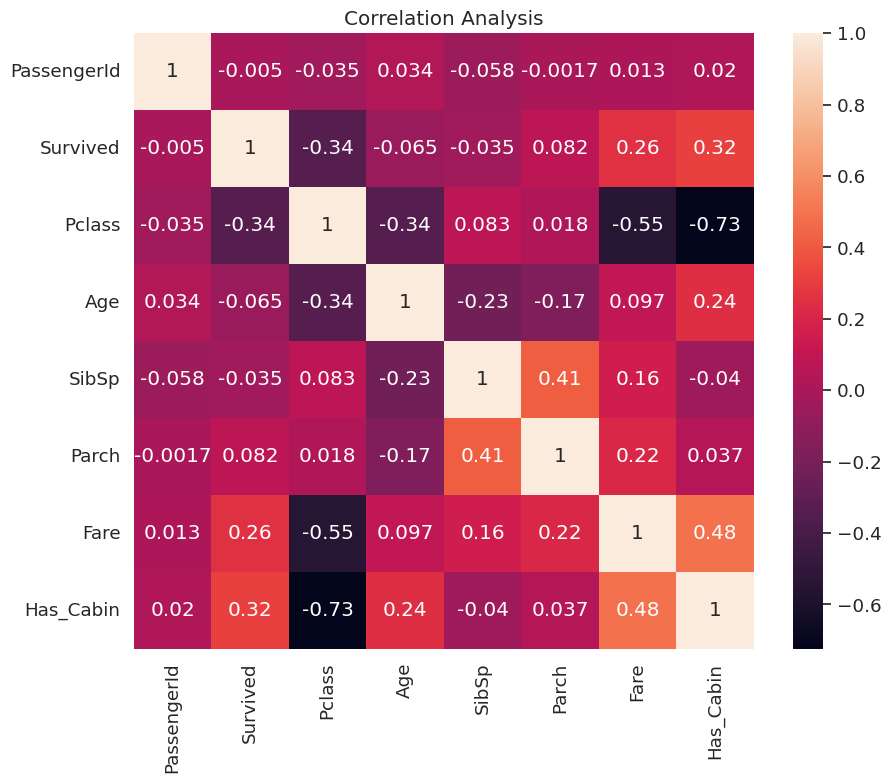

In [39]:
plt.figure(figsize=(10,8))
numeric_cols = titanic_df.select_dtypes(include=np.number).columns
sns.heatmap(titanic_df[numeric_cols].corr(), annot=True)
plt.title('Correlation Analysis')
plt.show()

In [40]:
!pip install ydata-profiling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00


In [41]:
from ydata_profiling import ProfileReport

profile = ProfileReport(titanic_df, title='Titanic Dataset Profiling Report')

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 49.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
# save the report in html file
profile.to_file('titanic_report_profiling.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]